# Matplotlib: the easy way

## Introduction

Matplotlib is probably the most-used 2D plotting library in the Python ecosystem. It's a powerful package for generating publication quality figures. Matplotlib has two interfaces that allow you to make plots in two very different ways. The pyplot module is a state-based interface, and is generally the recommended way to go about your plotting. However, having familiarity with the object-oriented plotting interface can be useful when you need to create a custom graph. 

In this workshop, we'll first look at how to use the state-based interface, pyplot, and then learn about the object-oriented interface (and the scenarios in which you would want to use this interface).

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# this line will let us display the graphs inline with the code in the Jupyter notebook (more on this later)
%matplotlib notebook

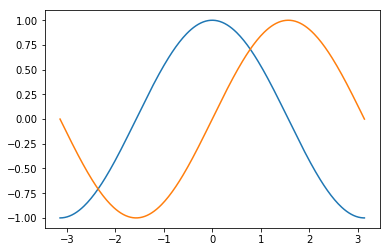

In [2]:
# create some data to plot
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C,S = np.cos(X), np.sin(X)
# plot them with MATLAB style command plt.plot
plt.plot(X,C)
plt.plot(X,S)
#plt.show()

### What just happened here?

The output of the cell above this one shows a single figure with a single set of axes and two lines plotted within. But we also got something else, there should be a line printed above the plot indicating the object that was created with the `plot()` command and the address where the object is stored in your computer's memory. The `matplotlib.lines.Line2D` indicates the type of graphics primitive that is in your figure. We'll get more into what this is in the next notebook. 

#### The versatility of `plot()`

`plot()` takes an arbitrary number of arguments, but it requires at least one vector of numerical values to generate a plot. The first vector is assumed to be the data plotted on the X-axis and the second is assumed to be the data plotted on the Y-axis. All other arguments supplied to `plot()` command pertain to the style of the `Line2D` object inside the plot. You can get a sense for how to control the aesthetics of the plot [here](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D).

#### When to use `show()`

Normally, when you use the `plot()` command, the pertinent objects contained inside the plot are created, but they're not necessarily visible to the user. This is why in the cell above, we see the line `[<matplotlib.lines.Line2D at 0x118e95908>]` printed in the output. If uncomment the `plt.show()` line and run the cell again, we see that we get the same plot but without the additional text. The `show()` command tells your graphics driver on your machine to display the graph, but we use the `notebook` backend we can see the graph without having to call `show()`. 

## Using `pyplot` to its fullest

The [matplotlib gallery](https://matplotlib.org/gallery.html) has fantastic examples of different types of figures (i.e. scatter plots, histograms, barcharts, images, heatmaps). But, speaking for myself, finding good examples of the plotting styles I wanted was never the focus of the issues that I'd have making plots with matplotlib. 

Most of the issues I'd run into pertained to axes limits and styling, annotation, and aesthetics. I'd usually end up on StackOverflow to find a solution to the problem, but implement those solutions without understanding how they really worked. 

Here I'll demonstrate how to control some of these features and explain how they work.

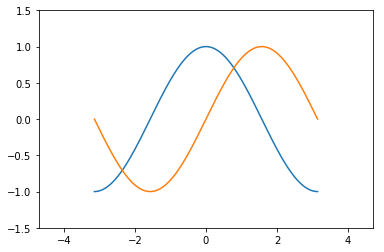

In [3]:
plt.plot(X,C)
plt.plot(X,S)
# Limits of the the axes can be manipulated with .xlim() and .ylim()
# These functions get the current axes of the plot when no arguments are supplied
# These functions set the current axes of the plot when arguments are given
plt.xlim(X.min() * 1.5, X.max() * 1.5)
plt.ylim(C.min() * 1.5, C.max() * 1.5)
plt.show()

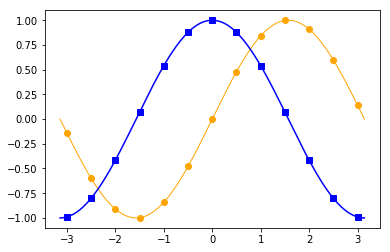

In [4]:
# here we set linewidth to 1 and the color to 'orange'
plt.plot(X,S, linewidth = 1, color = 'orange')
# in this object we tell matplotlib to plot orange markers with no line
plt.plot(np.arange(-3,3.5,0.5), np.sin(np.arange(-3,3.5,0.5)), marker = 'o', color = 'orange', linestyle = 'None')
# but pyplot has a convenient shorthand for styling certain aspects of the plot, here 'b' refers to a blue line
plt.plot(X,C,'b') 
# 'bs' is shorthand for blue square
plt.plot(np.arange(-3,3.5,0.5), np.cos(np.arange(-3,3.5,0.5)), 'bs') 
plt.show()

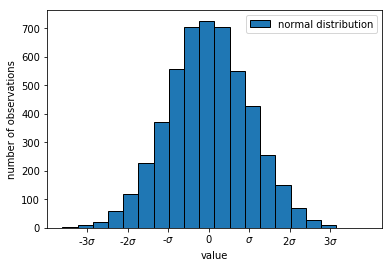

In [5]:
n_points = 5000
n_bins = 20
np.random.seed(144)

# generate a normal distribution
mu, sigma = 0, 20
x = mu + sigma * np.random.randn(n_points)

# plot the histogram
plt.hist(x, bins = n_bins, edgecolor = 'k', label = 'normal distribution')

# we can change the x-ticks to something more meaningful with the .xticks() or .yticks()
# we can also change the text for labels on the ticks (even with LATEX)
plt.xticks(np.arange(-3*sigma,4*sigma,sigma), [r'-3$\sigma$', r'-2$\sigma$', r'-$\sigma$', r'0', r'$\sigma$', r'2$\sigma$', r'3$\sigma$'])

# axes labels can be changed with .xlabel() and .ylabel()
plt.xlabel('value')
plt.ylabel('number of observations')

# add a legend with .legend()
plt.legend()

# show the plot!
plt.show()

In [6]:
# we don't need to specify all the aesthetic parameters we want if we use a stylesheet
print(plt.style.available)

['_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10']


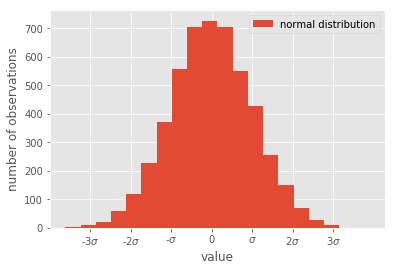

In [7]:
plt.style.use('ggplot')

plt.hist(x, bins = n_bins, label = 'normal distribution')

# we can change the x-ticks to something more meaningful with the .xticks() or .yticks()
# we can also change the text for labels on the ticks (even with LATEX)
plt.xticks(np.arange(-3*sigma,4*sigma,sigma), [r'-3$\sigma$', r'-2$\sigma$', r'-$\sigma$', r'0', r'$\sigma$', r'2$\sigma$', r'3$\sigma$'])

# axes labels can be changed with .xlabel() and .ylabel()
plt.xlabel('value')
plt.ylabel('number of observations')

# add a legend with .legend()
plt.legend()

# show the plot!
plt.show()

## Exercise

Create a dummy data set of three dimensions with 100 observations. Plot the points, using the thrid dimension to color the points. 


## Resources

While this notebook has straightforward examples, you can do quite a lot of advanced plotting with the `pyplot` module. The [matplotlib gallery](https://matplotlib.org/gallery/index.html) is a great place to start, but there's even more valuable material in the [intermediate](https://matplotlib.org/tutorials/index.html#intermediate) and [advanced](https://matplotlib.org/tutorials/index.html#advanced) `pyplot` tutorials. There are tutorials on controlling layouts of multiple axes on a single figure, transforming data values to display coordinates, and creating paths for custom annotations.